# Phase 1 vs. Phase 1 Volcano Plots

using results from [deseq_phase1.v.phase1.ipynb](https://github.com/jgmcdonough/CE24_RNA-seq/blob/main/analysis/diff_expression/deseq_phase1.v.phase1.ipynb) to generate publication-formatted volcano plots

### 0. load libraries

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   4.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 1. load CSVs

In [3]:
##### comparisons vs. control
# warm vs. control
w.c <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.warm_v_control.csv')

# both vs. control
b.c <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.both_v_control.csv')

# hyp vs. control
h.c <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.hyp_v_control.csv')

##### other comparisons
# hyp vs. both
h.b <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.hyp_v_both.csv')

# warm vs. both
w.b <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.warm_v_both.csv')

# warm vs. hyp
w.h <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.warm_v_hyp.csv')

### 2. ggplot

#### comparisons vs. control

In [20]:
# create function to assign up- and down-regulated to genes
assign_dir <- function(df) {
    new_df <- df %>%
mutate(
    direction = case_when(
        log2FoldChange > 0.25 & padj <= 0.05 ~ "Up",
        log2FoldChange < 0.25 & padj <= 0.05 ~ "Down",
        TRUE ~ "NS"
        )
    )
    }

In [21]:
w.c <- assign_dir(w.c)
h.c <- assign_dir(h.c)
b.c <- assign_dir(b.c)

# check it worked
unique(w.c$direction)
head(w.c)

[1] "NS"   "Up"   "Down"

,X,baseMean,log2FoldChange,lfcSE,pvalue,padj,direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111116054,8.739763,0.0074950539,0.10558225,0.45516653,0.9628155,NS
2,LOC111126949,670.509082,-0.0008413897,0.06985369,0.94068617,0.9983738,NS
3,LOC111110729,160.018313,-0.0659273575,0.13361268,0.02972751,0.5352822,NS
4,LOC111112434,13.048074,-0.0124548917,0.10906392,0.26872606,0.8946927,NS
5,LOC111120752,403.233517,0.0128102382,0.07701767,0.33629149,0.9266293,NS
6,LOC111128944,1.594569,-0.0034572083,0.17695745,0.77724045,NA,NS


#### warm vs. control

Warning message:
“Removed 7345 rows containing missing values or values outside the scale range
(`geom_point()`).”


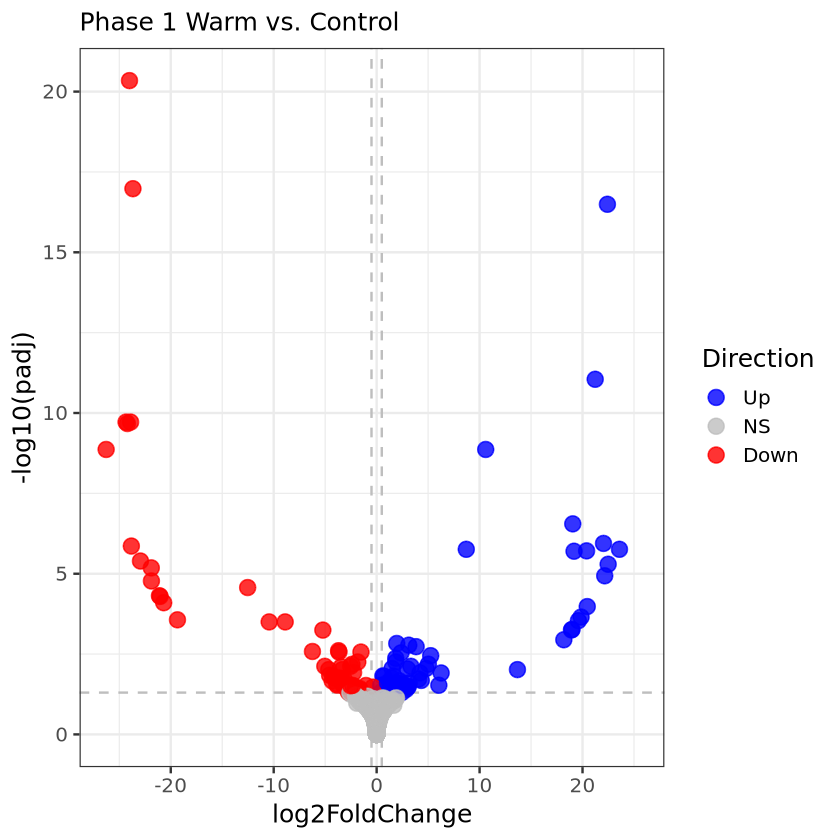

In [16]:
# warm vs. control
ggplot(data = w.c, aes(x = log2FoldChange, 
                       y = -log10(padj),
                       col = direction)) +
# fold change threshold line
geom_vline(xintercept = c(-0.5, 0.5), 
           col = "gray",
           linetype = "dashed") +
# adjusted p-value line
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = "dashed") +
geom_point(size=4, alpha = 0.8) +
scale_color_manual(values=c('red', 'gray', 'blue')) +
theme_bw(base_size = 15) +
labs(subtitle = 'Phase 1 Warm vs. Control',
     col = 'Direction') +
guides(col = guide_legend(reverse = TRUE))

#### hyp vs. control

Warning message:
“Removed 5371 rows containing missing values or values outside the scale range
(`geom_point()`).”


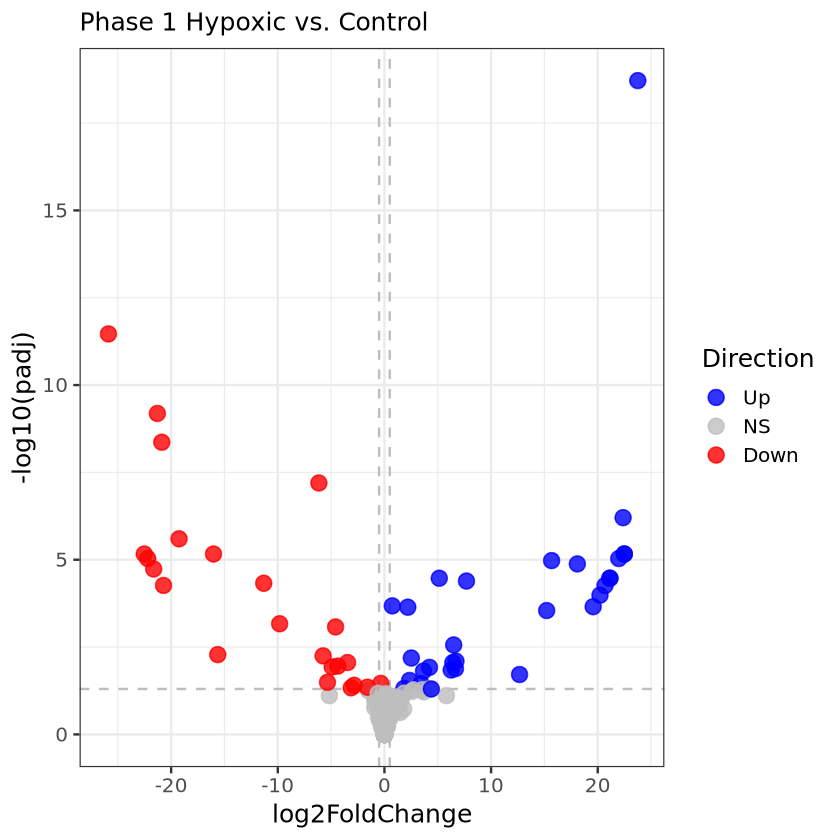

In [23]:
# hyp vs. control
ggplot(data = h.c, aes(x = log2FoldChange, 
                       y = -log10(padj),
                       col = direction)) +
# fold change threshold line
geom_vline(xintercept = c(-0.5, 0.5), 
           col = "gray",
           linetype = "dashed") +
# adjusted p-value line
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = "dashed") +
geom_point(size=4, alpha = 0.8) +
scale_color_manual(values=c('red', 'gray', 'blue')) +
theme_bw(base_size = 15) +
labs(subtitle = 'Phase 1 Hypoxic vs. Control',
     col = 'Direction') +
guides(col = guide_legend(reverse = TRUE))

#### both vs. control

Warning message:
“Removed 7958 rows containing missing values or values outside the scale range
(`geom_point()`).”


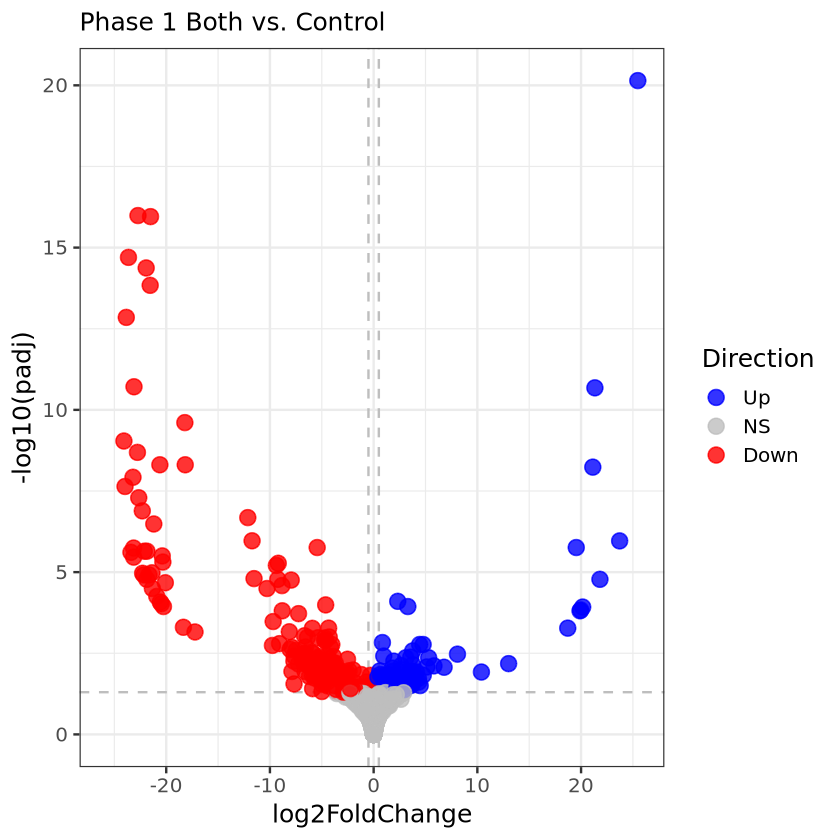

In [24]:
# both vs. control
ggplot(data = b.c, aes(x = log2FoldChange, 
                       y = -log10(padj),
                       col = direction)) +
# fold change threshold line
geom_vline(xintercept = c(-0.5, 0.5), 
           col = "gray",
           linetype = "dashed") +
# adjusted p-value line
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = "dashed") +
geom_point(size=4, alpha = 0.8) +
scale_color_manual(values=c('red', 'gray', 'blue')) +
theme_bw(base_size = 15) +
labs(subtitle = 'Phase 1 Both vs. Control',
     col = 'Direction') +
guides(col = guide_legend(reverse = TRUE))

#### other comparisons

In [25]:
# assign GE direction relative to what is "control" - function is above
w.h <- assign_dir(w.h) # warm is "control"
w.b <- assign_dir(w.b) # both is "control"
h.b <- assign_dir(h.b) # both is "control"

# check it worked
unique(w.h$direction)
head(w.h)

[1] "NS"   "Up"   "Down"

,X,baseMean,log2FoldChange,lfcSE,pvalue,padj,direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111116054,8.739763,0.02105434,0.1794452,0.536194836,0.9099615,NS
2,LOC111126949,670.509082,-0.01356614,0.1504477,0.795034412,0.9689757,NS
3,LOC111110729,160.018313,0.26573142,0.1871541,0.003676249,0.2214613,NS
4,LOC111112434,13.048074,0.03445700,0.1788035,0.378105153,0.8512991,NS
5,LOC111120752,403.233517,-0.10339030,0.1710581,0.106385661,0.6388378,NS
6,LOC111128944,1.594569,0.01279670,0.2300075,0.515389473,0.9041197,NS


#### warm vs. hypoxic

Warning message:
“Removed 6711 rows containing missing values or values outside the scale range
(`geom_point()`).”


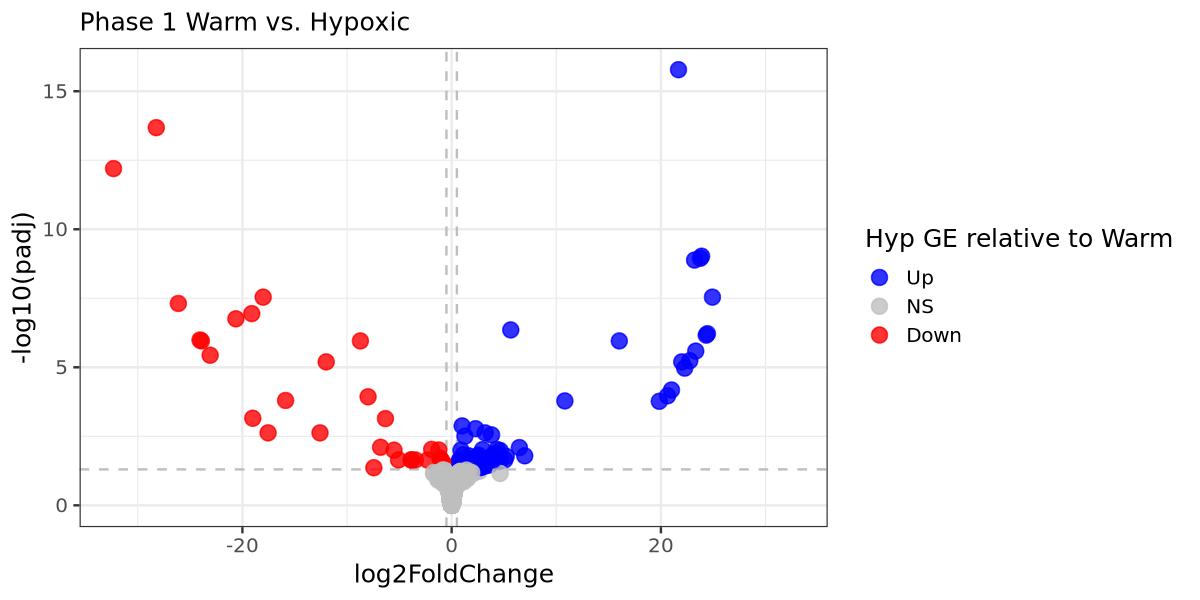

In [28]:
options(repr.plot.width=10, repr.plot.height=5)

# warm vs. hypoxic
ggplot(data = w.h, aes(x = log2FoldChange, 
                       y = -log10(padj),
                       col = direction)) +
# fold change threshold line
geom_vline(xintercept = c(-0.5, 0.5), 
           col = "gray",
           linetype = "dashed") +
# adjusted p-value line
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = "dashed") +
geom_point(size=4, alpha = 0.8) +
scale_color_manual(values=c('red', 'gray', 'blue')) +
theme_bw(base_size = 15) +
labs(subtitle = 'Phase 1 Warm vs. Hypoxic',
     col = 'Hyp GE relative to Warm') +
guides(col = guide_legend(reverse = TRUE))

#### hypoxic vs. both

Warning message:
“Removed 7345 rows containing missing values or values outside the scale range
(`geom_point()`).”


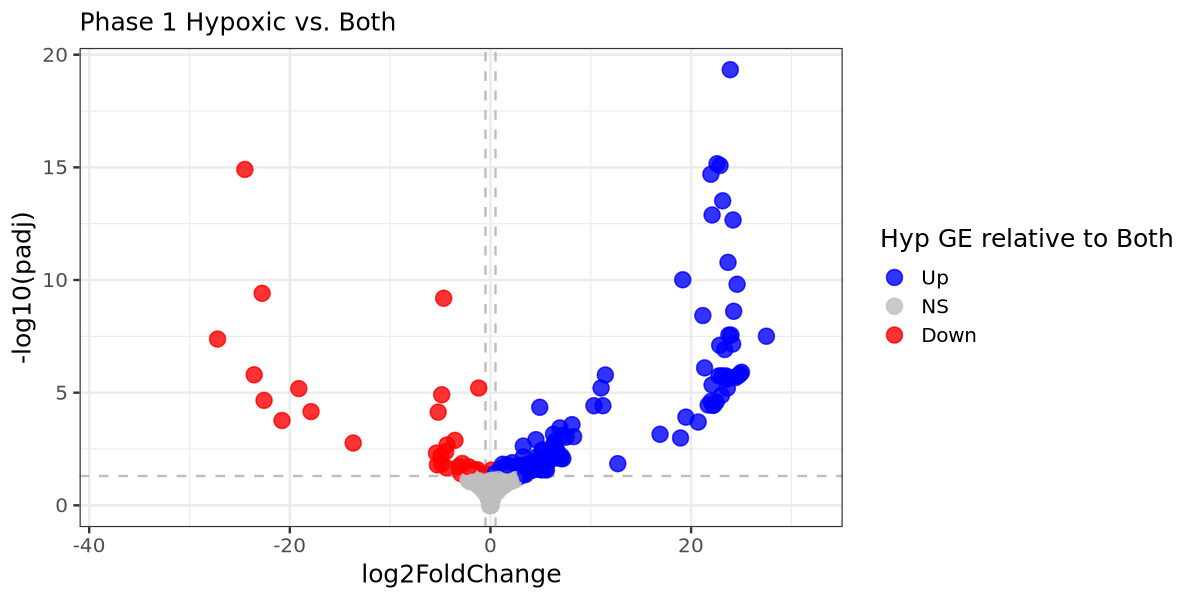

In [29]:
# hypoxic vs. both
ggplot(data = h.b, aes(x = log2FoldChange, 
                       y = -log10(padj),
                       col = direction)) +
# fold change threshold line
geom_vline(xintercept = c(-0.5, 0.5), 
           col = "gray",
           linetype = "dashed") +
# adjusted p-value line
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = "dashed") +
geom_point(size=4, alpha = 0.8) +
scale_color_manual(values=c('red', 'gray', 'blue')) +
theme_bw(base_size = 15) +
labs(subtitle = 'Phase 1 Hypoxic vs. Both',
     col = 'Hyp GE relative to Both') +
guides(col = guide_legend(reverse = TRUE))

#### warm vs. both

Warning message:
“Removed 9826 rows containing missing values or values outside the scale range
(`geom_point()`).”


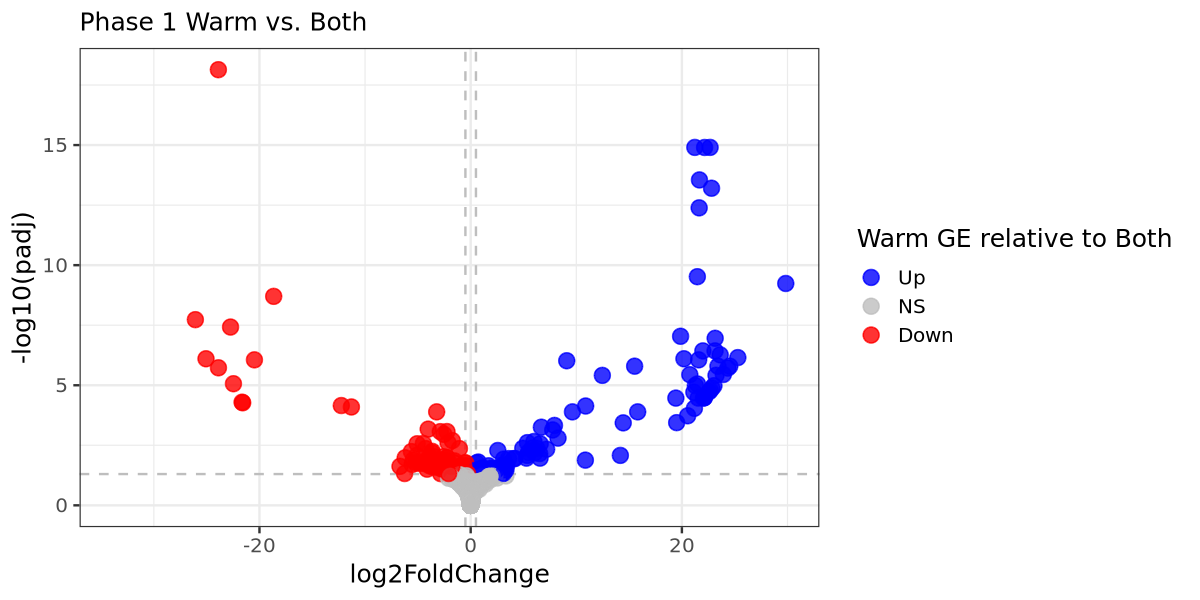

In [30]:
# warm vs. both
ggplot(data = w.b, aes(x = log2FoldChange, 
                       y = -log10(padj),
                       col = direction)) +
# fold change threshold line
geom_vline(xintercept = c(-0.5, 0.5), 
           col = "gray",
           linetype = "dashed") +
# adjusted p-value line
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = "dashed") +
geom_point(size=4, alpha = 0.8) +
scale_color_manual(values=c('red', 'gray', 'blue')) +
theme_bw(base_size = 15) +
labs(subtitle = 'Phase 1 Warm vs. Both',
     col = 'Warm GE relative to Both') +
guides(col = guide_legend(reverse = TRUE))